In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-population/World Population.csv


# Population Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
population=pd.read_csv('../input/world-population/World Population.csv')

In [4]:
population.head()

,Rank,Country,Region,Population,Percentage,Date
0,1,China,Asia,1411778724,17.80%,20-Nov
1,2,India,Asia,1386141732,17.50%,21-Dec
2,3,United States,Americas,332960297,4.20%,21-Dec
3,4,Indonesia,Asia,271350000,3.43%,20-Dec
4,5,Pakistan,Asia,225200000,2.84%,21-Jul


### What is the population of each region ?

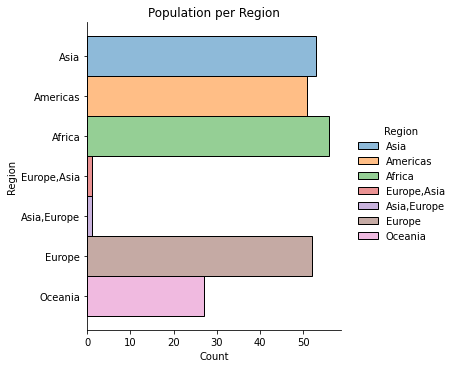

In [5]:
gr=sns.displot(data=population,y='Region',hue='Region', kde=True)
plt.title("Population per Region")
plt.show()

In [6]:
population.groupby('Region')['Population'].sum()

Region
Africa         1345290019
Americas       1024609723
Asia           4545166611
Asia,Europe      83614362
Europe          600873091
Europe,Asia     146171015
Oceania          43609090
Name: Population, dtype: int64

### Which country has the most population in each region ?

In [7]:
pop=population.drop(columns=["Rank","Date","Percentage"])
pop.head(3)
p=pop.groupby(["Region"], sort="True").head(1)
print(p)

          Country       Region  Population
0           China         Asia  1411778724
2   United States     Americas   332960297
6         Nigeria       Africa   211401000
8          Russia  Europe,Asia   146171015
17         Turkey  Asia,Europe    83614362
18        Germany       Europe    83129285
52      Australia      Oceania    25922849


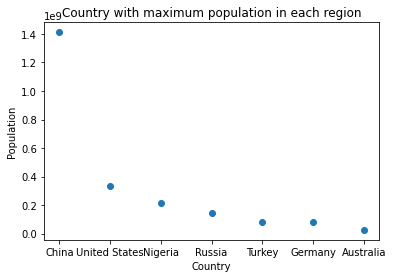

In [8]:
plt.scatter(p["Country"],p["Population"])
plt.title("Country with maximum population in each region")
plt.xlabel("Country")
plt.ylabel("Population")
plt.show()

### What is the percentage of the first 10 countries ?

In [9]:
pop=population.sort_values(by=['Population'], ascending=True)
percent=pop.tail(10)
print(percent)

   Rank        Country       Region  Population Percentage    Date
9    10         Mexico     Americas   126014024      1.59%  20-Mar
8     9         Russia  Europe,Asia   146171015      1.85%  21-Jan
7     8     Bangladesh         Asia   171950056      2.17%  21-Dec
6     7        Nigeria       Africa   211401000      2.67%  21-Jul
5     6         Brazil     Americas   214143381      2.70%  21-Dec
4     5       Pakistan         Asia   225200000      2.84%  21-Jul
3     4      Indonesia         Asia   271350000      3.43%  20-Dec
2     3  United States     Americas   332960297      4.20%  21-Dec
1     2          India         Asia  1386141732     17.50%  21-Dec
0     1          China         Asia  1411778724     17.80%  20-Nov


In [10]:
pt=pop.tail(10)["Percentage"].tolist()
sum=0
for i in range(len(pt)):
    sum+=float(pt[i][:-1])
print("The top 10 countries have a total of {0}% population".format(sum))

pd=pop.tail(10)["Percentage"].tolist()
res=0
for i in range(len(pd)):
    res+=float(pt[i][:1])
print("The bottom 10 countries have a total of {}% population".format(res))

The top 10 countries have a total of 56.75% population
The bottom 10 countries have a total of 19.0% population
